In [25]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [26]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
'''
n_quantilesint, default=1000 or n_samples
    Number of quantiles to be computed.
    It corresponds to the number of landmarks used to discretize the cumulative distribution function.
    If n_quantiles is larger than the number of samples, n_quantiles is set to the number of samples as a larger number of quantiles does not give a better approximation of the cumulative distribution function estimator.

output_distribution{‘uniform’, ‘normal’}, default=’uniform’
    Marginal distribution for the transformed data.
    The choices are ‘uniform’ (default) or ‘normal’.
'''
'''
The transformation is applied on each feature independently.
First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution.
The obtained values are then mapped to the desired output distribution using the associated quantile function.
Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution.
Note that this transform is non-linear.
It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.
'''
# 对每列数据进行均匀分布或正态分布数据缩放
quantile_transformer = QuantileTransformer(n_quantiles=150,
                                           output_distribution='normal',  # 正态分布
                                           random_state=0)
"""
X : array-like of shape (n_samples, n_features)
            Input samples.
"""
X_train_trans = quantile_transformer.fit_transform(X=X_train)
X_test_trans = quantile_transformer.transform(X_test)

C:\Users\duanm\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (150) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


[4.3   4.4   4.422 4.533 4.6   4.6   4.666 4.7   4.788 4.8   4.81  4.9
 4.9   4.9   4.9   4.965 5.    5.    5.    5.    5.02  5.1   5.1   5.1
 5.1   5.1   5.1   5.1   5.2   5.219 5.33  5.4   5.4   5.4   5.474 5.5
 5.5   5.5   5.518 5.6   5.6   5.6   5.662 5.7   5.7   5.7   5.7   5.7
 5.728 5.8   5.8   5.8   5.8   5.8   5.894 5.9   5.916 6.    6.    6.049
 6.16  6.2   6.282 6.3   6.3   6.3   6.3   6.3   6.3   6.359 6.4   6.4
 6.4   6.5   6.5   6.5   6.536 6.6   6.658 6.7   6.7   6.7   6.7   6.7
 6.724 6.8   6.846 6.9   6.9   6.9   6.99  7.101 7.2   7.2   7.268 7.49
 7.656 7.7   7.7   7.7  ]
[-5.19933758 -2.21112724 -2.14848794 -1.8500146  -1.69492268 -1.69492268
 -1.56241595 -1.49415491 -1.358675   -1.34020047 -1.32067002 -1.14489597
 -1.14489597 -1.14489597 -1.14489597 -1.00649494 -0.93197131 -0.93197131
 -0.93197131 -0.93197131 -0.88765016 -0.71036555 -0.71036555 -0.71036555
 -0.71036555 -0.71036555 -0.71036555 -0.71036555 -0.57163753 -0.56414244
 -0.51299362 -0.4682027  -0.4682027  -

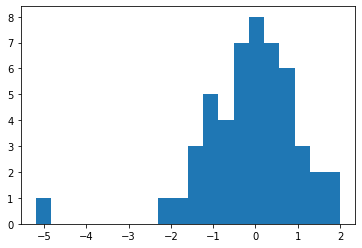

****************************************************************************************************
[2.    2.2   2.222 2.3   2.3   2.355 2.4   2.4   2.488 2.5   2.5   2.5
 2.5   2.5   2.5   2.565 2.6   2.6   2.698 2.7   2.7   2.7   2.7   2.7
 2.764 2.8   2.8   2.8   2.8   2.819 2.9   2.9   2.9   2.9   2.974 3.
 3.    3.    3.    3.    3.    3.    3.    3.    3.    3.    3.    3.
 3.    3.    3.    3.    3.    3.    3.094 3.1   3.1   3.1   3.1   3.1
 3.1   3.1   3.182 3.2   3.2   3.2   3.2   3.2   3.2   3.2   3.2   3.2
 3.2   3.3   3.3   3.3   3.3   3.347 3.4   3.4   3.4   3.4   3.4   3.4
 3.4   3.435 3.5   3.5   3.5   3.579 3.6   3.7   3.7   3.723 3.8   3.8
 3.8   3.867 3.978 4.089]
[-5.19933758 -2.21112724 -2.12038501 -1.79866258 -1.79866258 -1.65065516
 -1.52955819 -1.52955819 -1.25076742 -1.2127505  -1.2127505  -1.2127505
 -1.2127505  -1.2127505  -1.2127505  -1.06510945 -0.98561042 -0.98561042
 -0.8195391  -0.81614989 -0.81614989 -0.81614989 -0.81614989 -0.81614989
 -0.69424265 -0.

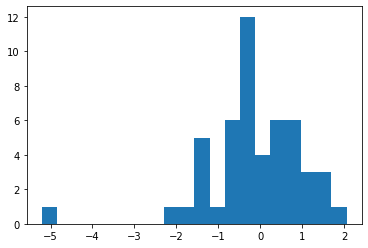

****************************************************************************************************
[1.1   1.2   1.222 1.3   1.3   1.3   1.3   1.377 1.4   1.4   1.4   1.4
 1.4   1.4   1.4   1.465 1.5   1.5   1.5   1.5   1.5   1.5   1.5   1.5
 1.5   1.575 1.6   1.6   1.6   1.6   1.63  1.7   1.7   2.519 3.222 3.47
 3.5   3.607 3.718 3.829 3.9   3.951 4.    4.    4.084 4.1   4.106 4.2
 4.2   4.2   4.25  4.361 4.4   4.4   4.494 4.5   4.5   4.527 4.6   4.649
 4.7   4.771 4.8   4.893 4.9   4.915 5.    5.    5.    5.059 5.1   5.1
 5.1   5.1   5.114 5.2   5.236 5.3   5.358 5.4   5.48  5.5   5.6   5.6
 5.6   5.635 5.7   5.7   5.768 5.8   5.8   5.9   5.912 6.023 6.1   6.1
 6.268 6.534 6.678 6.7  ]
[-5.19933758 -2.21112724 -2.09756224 -1.69492268 -1.69492268 -1.69492268
 -1.69492268 -1.34205444 -1.23665224 -1.23665224 -1.23665224 -1.23665224
 -1.23665224 -1.23665224 -1.23665224 -0.98407681 -0.84807465 -0.84807465
 -0.84807465 -0.84807465 -0.84807465 -0.84807465 -0.84807465 -0.84807465
 -0.848074

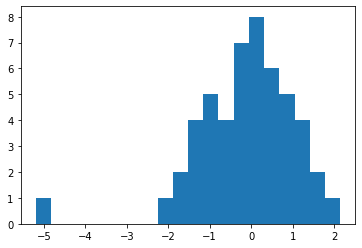

****************************************************************************************************
[0.1   0.1   0.1   0.133 0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2
 0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2
 0.264 0.3   0.3   0.3   0.4   0.4   0.4   0.441 0.552 0.852 1.    1.
 1.    1.007 1.1   1.1   1.14  1.2   1.2   1.273 1.3   1.3   1.3   1.3
 1.3   1.3   1.3   1.3   1.3   1.383 1.4   1.4   1.416 1.5   1.5   1.5
 1.5   1.5   1.582 1.6   1.604 1.7   1.726 1.8   1.8   1.8   1.8   1.8
 1.8   1.803 1.9   1.9   1.9   1.9   1.958 2.    2.    2.    2.002 2.1
 2.1   2.1   2.1   2.1   2.168 2.2   2.29  2.3   2.3   2.3   2.3   2.3
 2.3   2.367 2.4   2.489]
[-5.19933758 -5.19933758 -5.19933758 -3.8473615  -1.10244037 -1.10244037
 -1.10244037 -1.10244037 -1.10244037 -1.10244037 -1.10244037 -1.10244037
 -1.10244037 -1.10244037 -1.10244037 -1.10244037 -1.10244037 -1.10244037
 -1.10244037 -1.10244037 -1.10244037 -1.10244037 -1.10244037 -1.10244037
 -0.81503956 -

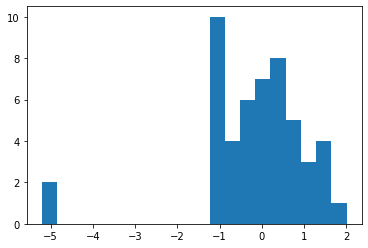

****************************************************************************************************


In [28]:
import matplotlib.pyplot as plt

for i in range(4):
    print(np.percentile(X_train[:, i], range(0, 100, 1)))
    print(np.percentile(X_train_trans[:, i], range(0, 100, 1)))
    plt.hist(np.percentile(X_train_trans[:, i], range(0, 100, 2)), bins=20)  # 趋向正态分布
    plt.show()
    print("*" * 100)